In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce

## DATA PROCESSING

In [2]:
OUTPUT_PATH = './Data/output/'

### 1. ELEMENTARY

In [3]:
raw_elementary_df = pd.read_csv(OUTPUT_PATH + 'public_elementary_enrollment2015_Clean.csv')
raw_len = len(raw_elementary_df)
raw_elementary_df = raw_elementary_df.dropna()
print('Dropped rows:', raw_len - len(raw_elementary_df))
print('Final data length:', len(raw_elementary_df))

Dropped rows: 3
Final data length: 500


In [4]:
raw_elementary_df.head()

,school_id,female_grade 1,female_grade 2,female_grade 3,female_grade 4,female_grade 5,female_grade 6,male_grade 1,male_grade 2,male_grade 3,male_grade 4,male_grade 5,male_grade 6,SCH_NAME,PSGC_BRGY
0,132981,22,17,29,25,26,30,25,14,29,34,19,25,Baas ES,PH150702002
1,132983,28,23,43,34,43,34,48,31,46,42,37,24,Campo Uno ES,PH150702018
2,132984,41,33,37,58,36,26,40,29,40,79,24,20,Dangkalan ES,PH150702025
3,132985,58,46,64,73,69,60,73,64,50,86,67,60,Jose Rizal ES,PH150702068
4,132986,205,204,249,236,209,194,189,187,243,251,206,185,Lamitan CES,PH150702064


In [5]:
raw_elementary_df['total_enrollees_elem'] = raw_elementary_df.iloc[:, 1:13].sum(axis=1)

school_count_elem = raw_elementary_df['PSGC_BRGY'].to_frame()

school_count_elem['school_count_elem'] = school_count_elem.groupby('PSGC_BRGY')['PSGC_BRGY'].transform('count')
school_count_elem.head()

,PSGC_BRGY,school_count_elem
0,PH150702002,1
1,PH150702018,1
2,PH150702025,1
3,PH150702068,1
4,PH150702064,2
...,...,...
498,PH153601026,1
499,PH153601027,1
500,PH153601016,1
501,PH153601013,1


### 2. SGD

In [6]:
raw_sgd_df = pd.read_csv(OUTPUT_PATH + 'Population_Schools_SDGs_Clean.csv', index_col=0)
raw_sgd_df = raw_sgd_df.dropna()
raw_sgd_df.head()

,PSGC_BRGY,both_age_0_to_4,male_age_0_to_4,female_age_0_to_4,both_age_5_to_9,male_age_5_to_9,female_age_5_to_9,both_age_10_to_14,male_age_10_to_14,female_age_10_to_14,...,SGD_Type_Worker_Pro,SGD_Type_Worker_Tec,SGD_Type_Worker_Cle,SGD_Type_Worker_Ser,SGD_Type_Worker_Ski,SGD_Type_Worker_Cra,SGD_Type_Worker_Pla,SGD_Type_Worker_Ele,SGD_Type_Worker_Arm,SGD_less_than_54_sqft
0,PH150702001,187.0,117.0,70.0,79.0,35.0,44.0,73.0,42.0,31.0,...,0.042654,0.014218,0.085308,0.208531,0.507109,0.033175,0.014218,0.052133,0.023697,0.275449
1,PH150702002,459.0,232.0,227.0,161.0,77.0,84.0,133.0,69.0,64.0,...,0.047619,0.002976,0.011905,0.047619,0.529762,0.053571,0.119048,0.113095,0.000000,0.287554
3,PH150702005,583.0,332.0,251.0,305.0,159.0,146.0,269.0,155.0,114.0,...,0.051637,0.021411,0.040302,0.070529,0.488665,0.032746,0.059194,0.164987,0.011335,0.002092
4,PH150702006,727.0,302.0,425.0,354.0,201.0,153.0,398.0,217.0,181.0,...,0.016966,0.002994,0.023952,0.106786,0.525948,0.019960,0.048902,0.171657,0.004990,0.061657
5,PH150702007,591.0,308.0,283.0,236.0,114.0,122.0,220.0,121.0,99.0,...,0.026316,0.011696,0.023392,0.084795,0.494152,0.081871,0.125731,0.096491,0.010234,0.391509


In [7]:
raw_sgd_df['SCH_ELEM'] = raw_sgd_df['SCH_CAT_ES'] + raw_sgd_df['SCH_CAT_CES'] + raw_sgd_df['SCH_CAT_PS']
sgd_schools = raw_sgd_df[['PSGC_BRGY', 'SCH_ELEM']]
sgd_schools.head()

,PSGC_BRGY,SCH_ELEM
0,PH150702001,1.0
1,PH150702002,1.0
3,PH150702005,1.0
4,PH150702006,1.0
5,PH150702007,1.0


In [8]:
school_count = school_count_elem.merge(sgd_schools, on='PSGC_BRGY')
school_count['common'] = np.where((school_count['school_count_elem']== school_count['SCH_ELEM']), True, False)
school_count['common'].value_counts()

True     404
False     18
Name: common, dtype: int64

In [9]:
final_brgy_list = school_count[school_count['common'] == True]
final_brgy_list = final_brgy_list.drop_duplicates()
final_brgy_list[final_brgy_list['school_count_elem'] ==1]

,PSGC_BRGY,school_count_elem,SCH_ELEM,common
0,PH150702002,1,1.0,True
1,PH150702018,1,1.0,True
2,PH150702025,1,1.0,True
3,PH150702068,1,1.0,True
6,PH150702008,1,1.0,True
...,...,...,...,...
417,PH153601026,1,1.0,True
418,PH153601027,1,1.0,True
419,PH153601016,1,1.0,True
420,PH153601013,1,1.0,True


Get only Barangays with same number of school in Population data and in School enrollment

In [10]:
cond = raw_elementary_df['PSGC_BRGY'].isin(final_brgy_list['PSGC_BRGY']) 
elementary_df = raw_elementary_df[cond]
elementary_df = elementary_df[['PSGC_BRGY', 'total_enrollees_elem']]
len(elementary_df)

404

In [11]:
cond = raw_sgd_df['PSGC_BRGY'].isin(final_brgy_list['PSGC_BRGY']) 
sgd_df = raw_sgd_df[cond]
len(sgd_df)

362

In [12]:
enrollment_df_elem = elementary_df.groupby('PSGC_BRGY', as_index=False)['total_enrollees_elem'].sum()
dataframes = [enrollment_df_elem,sgd_df]
dataset = reduce(lambda  left,right: pd.merge(left,right,on=['PSGC_BRGY'],how='left'), dataframes)
dataset.head()

,PSGC_BRGY,total_enrollees_elem,both_age_0_to_4,male_age_0_to_4,female_age_0_to_4,both_age_5_to_9,male_age_5_to_9,female_age_5_to_9,both_age_10_to_14,male_age_10_to_14,...,SGD_Type_Worker_Tec,SGD_Type_Worker_Cle,SGD_Type_Worker_Ser,SGD_Type_Worker_Ski,SGD_Type_Worker_Cra,SGD_Type_Worker_Pla,SGD_Type_Worker_Ele,SGD_Type_Worker_Arm,SGD_less_than_54_sqft,SCH_ELEM
0,PH150702001,166,187.0,117.0,70.0,79.0,35.0,44.0,73.0,42.0,...,0.014218,0.085308,0.208531,0.507109,0.033175,0.014218,0.052133,0.023697,0.275449,1.0
1,PH150702002,295,459.0,232.0,227.0,161.0,77.0,84.0,133.0,69.0,...,0.002976,0.011905,0.047619,0.529762,0.053571,0.119048,0.113095,0.000000,0.287554,1.0
2,PH150702005,378,583.0,332.0,251.0,305.0,159.0,146.0,269.0,155.0,...,0.021411,0.040302,0.070529,0.488665,0.032746,0.059194,0.164987,0.011335,0.002092,1.0
3,PH150702006,638,727.0,302.0,425.0,354.0,201.0,153.0,398.0,217.0,...,0.002994,0.023952,0.106786,0.525948,0.019960,0.048902,0.171657,0.004990,0.061657,1.0
4,PH150702007,229,591.0,308.0,283.0,236.0,114.0,122.0,220.0,121.0,...,0.011696,0.023392,0.084795,0.494152,0.081871,0.125731,0.096491,0.010234,0.391509,1.0


In [13]:
dataset['ratio_elem'] = dataset['total_enrollees_elem'] / dataset['both_age_6_to_12']
print('Min elem:', min(dataset['ratio_elem']))
print('Max elem:', max(dataset['ratio_elem']))

Min elem: 0.0
Max elem: 11.133333333333333


### 3. CORRELATION HEATMAP

In [14]:
cluster_df = dataset.iloc[:,79:]
cluster_df['SCH_ELEM_PRIVATE'] = dataset['SCH_CAT_PES']
cluster_df.head()

,SDG_Households_Electricity_Light_Pct,SDG_Households_Kerosene_Gass_Light_Pct,SDG_Households_Drinking_Owned_Faucet_Pct,SDG_Households_Drinking_Shared_Faucet_Pct,SGD_Households_Construction_Material_Concrete_Pct,SGD_Building_Tenure_Type_Owned_Pct,SGD_Type_Building_Single_Pct,SGD_Type_Worker_Man,SGD_Type_Worker_Pro,SGD_Type_Worker_Tec,...,SGD_Type_Worker_Ser,SGD_Type_Worker_Ski,SGD_Type_Worker_Cra,SGD_Type_Worker_Pla,SGD_Type_Worker_Ele,SGD_Type_Worker_Arm,SGD_less_than_54_sqft,SCH_ELEM,ratio_elem,SCH_ELEM_PRIVATE
0,0.656250,0.343750,0.050000,0.418750,0.076389,0.837500,0.986111,0.018957,0.042654,0.014218,...,0.208531,0.507109,0.033175,0.014218,0.052133,0.023697,0.275449,1.0,1.495495,0.0
1,0.792208,0.207792,0.051948,0.008658,0.247826,0.740260,0.873913,0.074405,0.047619,0.002976,...,0.047619,0.529762,0.053571,0.119048,0.113095,0.000000,0.287554,1.0,1.411483,0.0
2,0.870968,0.126728,0.099078,0.730415,0.147541,0.612903,0.887588,0.054156,0.051637,0.021411,...,0.070529,0.488665,0.032746,0.059194,0.164987,0.011335,0.002092,1.0,0.919708,0.0
3,0.719780,0.236264,0.001832,0.012821,0.058608,0.119048,0.941392,0.076846,0.016966,0.002994,...,0.106786,0.525948,0.019960,0.048902,0.171657,0.004990,0.061657,1.0,1.210626,0.0
4,0.831050,0.157534,0.287671,0.321918,0.112150,0.212329,0.995327,0.043860,0.026316,0.011696,...,0.084795,0.494152,0.081871,0.125731,0.096491,0.010234,0.391509,1.0,0.745928,0.0


Text(0.5, 1.0, 'Correlation Heatmap')

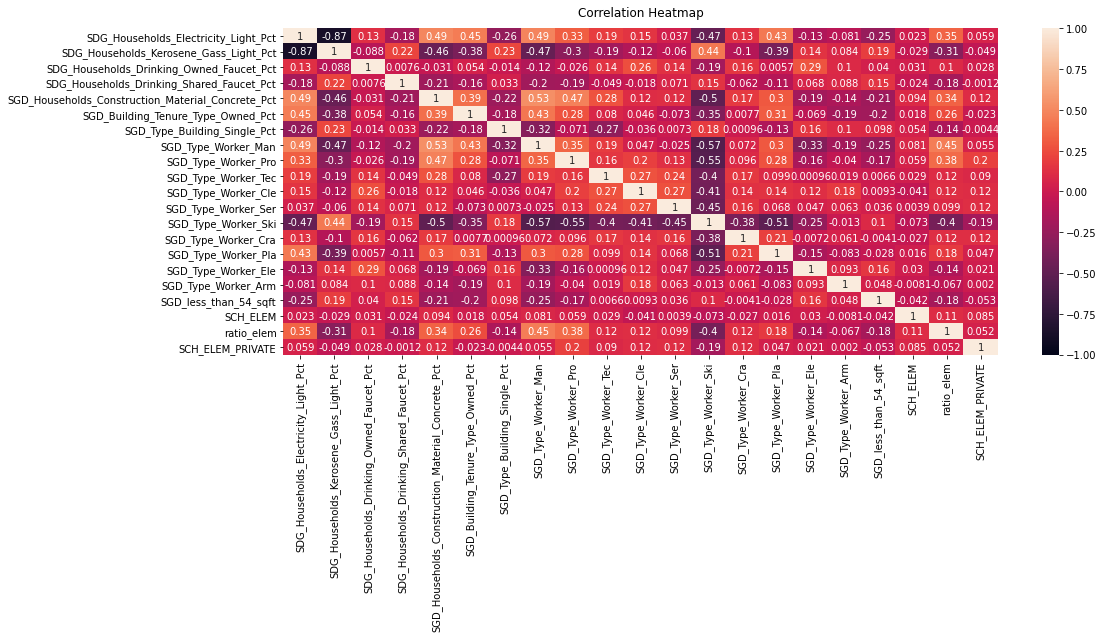

In [15]:
heatmap_df = dataset.drop(['PSGC_BRGY'], axis=1)
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(cluster_df.corr(), vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [16]:
kmeans_data = cluster_df.copy()
# kmeans_data = kmeans_data.drop(['ratio_elem'], axis=1)

Since all are in percentage, no need to scale

### 4. PCA

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=len(kmeans_data.columns))
X_principal = pca.fit_transform(kmeans_data)

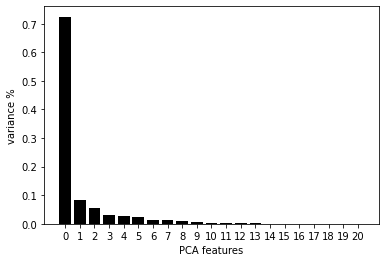

In [55]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [56]:
PCA_THRESHOLD = 0.7

In [57]:
explained_ratio = list(pca.explained_variance_ratio_)
feature_list = []
for i in range(pca.n_components_):
    if explained_ratio[i] > PCA_THRESHOLD:
        feature_list.append(i)

In [58]:
PCA_components = pd.DataFrame(X_principal)
PCA_components = PCA_components[feature_list]
PCA_components.head()

,0
0,0.034096
1,-0.003910
2,-0.508288
3,-0.264897
4,-0.706297


## CLUSTERING

In [59]:
from sklearn.cluster import KMeans

In [60]:
sse = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(PCA_components)
    sse.append(kmeans.inertia_)

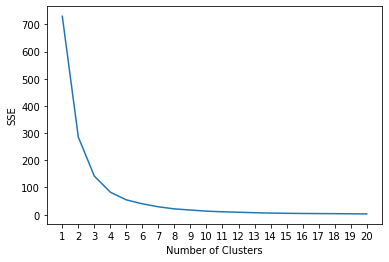

In [61]:
plt.plot(range(1,21), sse)
plt.xticks(range(1,21))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [62]:
N_CLUSTERS = 4

In [63]:
kmeans = KMeans(n_clusters=N_CLUSTERS)
predicted = kmeans.fit_predict(PCA_components)

In [64]:
kmeans_data['PSGC_BRGY'] = dataset['PSGC_BRGY']
# kmeans_data['SCH_ELEM'] = dataset['SCH_ELEM']
# kmeans_data['ratio'] = dataset['ratio_elem']
kmeans_data['cluster'] = predicted

In [83]:
eval_df = kmeans_data.copy()
eval_df = eval_df.drop(['PSGC_BRGY'], axis=1)
eval_df = eval_df.groupby('cluster', as_index=False).mean()
# eval_df = eval_df.drop(['cluster'], axis=1)
eval_df

,cluster,SDG_Households_Electricity_Light_Pct,SDG_Households_Kerosene_Gass_Light_Pct,SDG_Households_Drinking_Owned_Faucet_Pct,SDG_Households_Drinking_Shared_Faucet_Pct,SGD_Households_Construction_Material_Concrete_Pct,SGD_Building_Tenure_Type_Owned_Pct,SGD_Type_Building_Single_Pct,SGD_Type_Worker_Man,SGD_Type_Worker_Pro,...,SGD_Type_Worker_Ser,SGD_Type_Worker_Ski,SGD_Type_Worker_Cra,SGD_Type_Worker_Pla,SGD_Type_Worker_Ele,SGD_Type_Worker_Arm,SGD_less_than_54_sqft,SCH_ELEM,ratio_elem,SCH_ELEM_PRIVATE
0,0,0.585637,0.297807,0.094118,0.208912,0.116928,0.588247,0.935244,0.078723,0.022268,...,0.054808,0.638995,0.025974,0.050476,0.097549,0.004149,0.092451,1.068783,0.572440,0.010582
1,1,0.998611,0.000000,0.036970,0.044216,0.321844,0.882125,0.816993,0.280371,0.065857,...,0.081207,0.357678,0.026205,0.098096,0.049966,0.000000,0.009514,1.222222,7.370061,0.000000
2,2,0.866207,0.097754,0.153512,0.103473,0.243204,0.750317,0.860628,0.125586,0.053284,...,0.077278,0.519245,0.032994,0.069167,0.078434,0.005288,0.047075,1.145299,1.579306,0.017094
3,3,0.970167,0.022570,0.180498,0.023561,0.385729,0.860500,0.877930,0.209440,0.096910,...,0.073177,0.413571,0.039814,0.085890,0.043111,0.001002,0.005388,1.212766,3.321522,0.021277


In [85]:
df_pivot = pd.pivot_table(
    eval_df,
    columns='cluster'
)

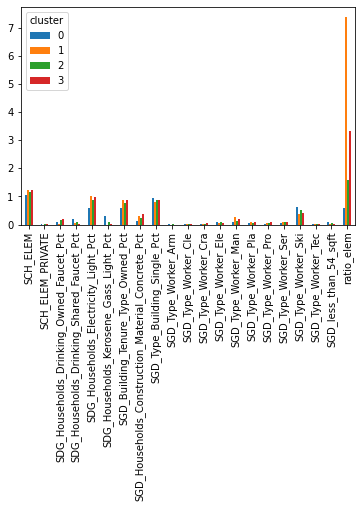

In [91]:

df_pivot.plot(kind="bar")

plt.show()

In [ ]:
kmeans_data.to_csv(OUTPUT_PATH + 'cluster_elem.csv', index=False)